Q.1) Write a program to forecast the number of passengers travelling in an airline (The dataset is attached) using fuzzy time series forecasting        employing Linear Regression model. Use 70-15-15% ratio in train-validation-test sets.
 Specification: The universe of discourse (UOD) of time series is obtained by taking a practical 10% decrement and 10% increment on the minimum and maximum value of the time series. Once the UOD for the time series is identified, it is split into several equal length intervals. Set length of interval as 10. Then the time series is converted to a fuzzy time series by exchanging each observation of the time series by the index of the belonging interval of the observation. After the data is fuzzified, the high order fuzzy logical relationships (FLRs) are established. Here, the order of the fuzzy TSF model is set to 12. 
Then the FLRs are modelled using Linear Regression. Once the fuzzified forecasts are obtained, it is defuzzified and forecasting accuracy is measured.

RMSE: 205.5763650127413


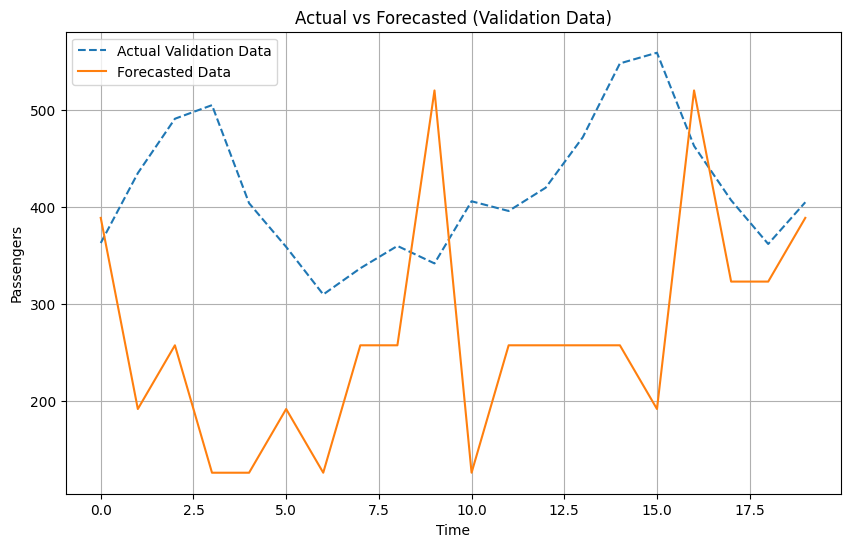

Forecasted: [388.9        192.03333333 257.65555556 126.41111111 126.41111111
 192.03333333 126.41111111 257.65555556 257.65555556 520.14444444
 126.41111111 257.65555556 257.65555556 257.65555556 257.65555556
 192.03333333 520.14444444 323.27777778 323.27777778 388.9       ]
Actual: [363 435 491 505 404 359 310 337 360 342 406 396 420 472 548 559 463 407
 362 405]


In [32]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('Passengers.csv')
data = data['#Passengers'].values

# Fuzzification
min_val = data.min()
max_val = data.max()
uod = np.linspace(min_val * 0.9, max_val * 1.1, 10)  
interval = 10
fuzzy_data = np.zeros(len(data))
for i in range(len(data)):
    for j in range(len(uod) - 1):
        if data[i] >= uod[j] and data[i] <= uod[j + 1]:
            fuzzy_data[i] = j
            break

order = 12
flr = np.zeros((order, len(fuzzy_data) - order))
for i in range(order):
    flr[i] = fuzzy_data[i:len(fuzzy_data) - order + i]

X = flr.T
y = fuzzy_data[order:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
y_pred = np.round(y_pred)
y_pred = np.clip(y_pred, 0, 9)
y_pred = y_pred.astype(int)

defuzzified = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    defuzzified[i] = (uod[y_pred[i]] + uod[y_pred[i] + 1]) / 2

actual_val_data = data[order + int(len(data) * 0.7):][:len(defuzzified)]

rmse = np.sqrt(mean_squared_error(defuzzified, actual_val_data))
print('RMSE:', rmse)

plt.figure(figsize=(10, 6))
plt.plot(actual_val_data, label='Actual Validation Data', linestyle='--')
plt.plot(defuzzified, label='Forecasted Data', linestyle='-')
plt.title('Actual vs Forecasted (Validation Data)')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

print('Forecasted:', defuzzified)
print('Actual:', actual_val_data)


Q.2) Rewrite the question no. 1 employing LSTM model. The LSTM model has four layers: First Layer- Input Layer, Second Layer – LSTM Layer with 64 LSTM units, Third Layer – Fully Connected Layer with 32 neurons, Fourth Layer – Output Layer with single neuron. Repeat the simulations for 10 times and obtain the mean RMSE over 10 independent simulations.

1/1 [==============================] - 1s 788ms/step
Simulation 20 - RMSE: 199.59201801254724
1/1 [==============================] - 1s 741ms/step
Simulation 20 - RMSE: 199.59201801254724
1/1 [==============================] - 1s 961ms/step
Simulation 20 - RMSE: 199.59201801254724
1/1 [==============================] - 1s 1s/step
Simulation 20 - RMSE: 197.36174138612319
1/1 [==============================] - 1s 1s/step
Simulation 20 - RMSE: 199.59201801254724
1/1 [==============================] - 1s 1s/step
Simulation 20 - RMSE: 203.89290537975452
1/1 [==============================] - 1s 1s/step
Simulation 20 - RMSE: 199.59201801254724
1/1 [==============================] - 1s 690ms/step
Simulation 20 - RMSE: 199.59201801254724
1/1 [==============================] - 1s 824ms/step
Simulation 20 - RMSE: 203.89290537975452
1/1 [==============================] - 1s 767ms/step
Simulation 20 - RMSE: 199.59201801254724
Mean RMSE over 10 simulations: 200.22916782334627


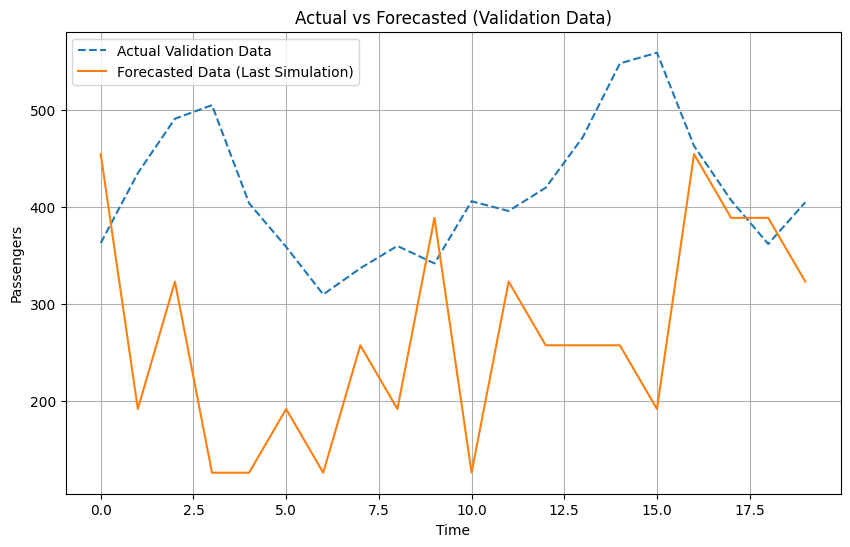

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense

data = pd.read_csv('Passengers.csv')
data = data['#Passengers'].values

min_val = data.min()
max_val = data.max()
uod = np.linspace(min_val * 0.9, max_val * 1.1, 10)  
interval = 10
fuzzy_data = np.zeros(len(data))
for i in range(len(data)):
    for j in range(len(uod) - 1):
        if data[i] >= uod[j] and data[i] <= uod[j + 1]:
            fuzzy_data[i] = j
            break

order = 12
flr = np.zeros((order, len(fuzzy_data) - order))
for i in range(order):
    flr[i] = fuzzy_data[i:len(fuzzy_data) - order + i]

X = flr.T
y = fuzzy_data[order:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))  
    model.add(Dense(32, activation='relu'))  
    model.add(Dense(1))  
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

rmse_scores = []
for i in range(10):
    model = create_lstm_model()
    model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), verbose=0)

    y_pred = model.predict(X_val)
    y_pred = np.round(y_pred)
    y_pred = np.clip(y_pred, 0, 9).astype(int)  
    
    defuzzified = np.zeros(len(y_pred))
    for i in range(len(y_pred)):
        defuzzified[i] = (uod[y_pred[i][0]] + uod[y_pred[i][0] + 1]) / 2
    
    actual_val_data = data[order + int(len(data) * 0.7):][:len(defuzzified)]
    
    rmse = np.sqrt(mean_squared_error(defuzzified, actual_val_data))
    rmse_scores.append(rmse)
    print(f"Simulation {i+1} - RMSE: {rmse}")

mean_rmse = np.mean(rmse_scores)
print(f"Mean RMSE over 10 simulations: {mean_rmse}")

plt.figure(figsize=(10, 6))
plt.plot(actual_val_data, label='Actual Validation Data', linestyle='--')
plt.plot(defuzzified, label='Forecasted Data (Last Simulation)', linestyle='-')
plt.title('Actual vs Forecasted (Validation Data)')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

Q.3) Rewrite the question no. 1 employing GRU model. The GRU model has four layers: First Layer- Input Layer, Second Layer – GRU Layer with 64 GRU units, Third Layer – Fully Connected Layer with 32 neurons, Fourth Layer – Output Layer with single neuron. Repeat the simulations for 10 times and obtain the mean RMSE over 10 independent simulations.

1/1 [==============================] - 1s 755ms/step
RMSE: 208.66790835034658


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13148\2212537362.py:61: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  defuzzified[i] = (uod[y_pred[i]] + uod[y_pred[i] + 1]) / 2


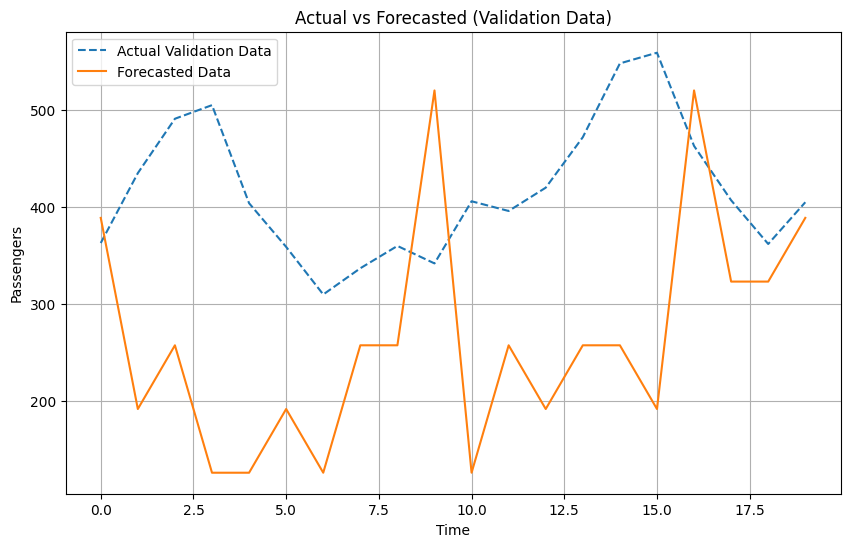

Forecasted: [388.9        192.03333333 257.65555556 126.41111111 126.41111111
 192.03333333 126.41111111 257.65555556 257.65555556 520.14444444
 126.41111111 257.65555556 192.03333333 257.65555556 257.65555556
 192.03333333 520.14444444 323.27777778 323.27777778 388.9       ]
Actual: [363 435 491 505 404 359 310 337 360 342 406 396 420 472 548 559 463 407
 362 405]


In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

data = pd.read_csv('Passengers.csv')
data = data['#Passengers'].values

min_val = data.min()
max_val = data.max()
uod = np.linspace(min_val * 0.9, max_val * 1.1, 10)  
fuzzy_data = np.zeros(len(data))

for i in range(len(data)):
    for j in range(len(uod) - 1):
        if data[i] >= uod[j] and data[i] <= uod[j + 1]:
            fuzzy_data[i] = j
            break

order = 12
flr = np.zeros((order, len(fuzzy_data) - order))
for i in range(order):
    flr[i] = fuzzy_data[i:len(fuzzy_data) - order + i]

X = flr.T
y = fuzzy_data[order:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_reshaped = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=0)

y_pred = model.predict(X_val_reshaped)
y_pred = np.round(y_pred).astype(int)
y_pred = np.clip(y_pred, 0, 9)

defuzzified = np.zeros(len(y_pred))
for i in range(len(y_pred)):
    defuzzified[i] = (uod[y_pred[i]] + uod[y_pred[i] + 1]) / 2

actual_val_data = data[order + int(len(data) * 0.7):][:len(defuzzified)]

rmse = np.sqrt(mean_squared_error(defuzzified, actual_val_data))
print('RMSE:', rmse)

plt.figure(figsize=(10, 6))
plt.plot(actual_val_data, label='Actual Validation Data', linestyle='--')
plt.plot(defuzzified, label='Forecasted Data', linestyle='-')
plt.title('Actual vs Forecasted (Validation Data)')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

print('Forecasted:', defuzzified)
print('Actual:', actual_val_data)


Q.4)  The best result is of q.1 using the linear regression model as it gives the best rmse among all the three questions.